In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
bar_data = pd.read_csv("../src/combined_data_processed_data.csv")

<Figure size 1000x600 with 0 Axes>

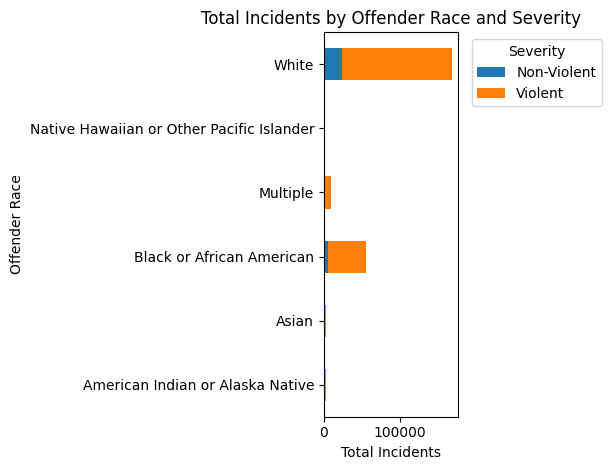

In [3]:
# Filter the data to include only the desired offender races
selected_races = ['White', 'Black or African American', 'Multiple', 'Asian',
                  'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']
filtered_data = bar_data[bar_data['OFFENDER_RACE'].isin(selected_races)]

# Group the data by 'OFFENDER_RACE' and 'SEVERITY' and calculate the sum
severity_by_race = filtered_data.groupby(['OFFENDER_RACE', 'SEVERITY'])['SEVERITY'].count().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(10, 6))
severity_by_race.plot(kind='barh', stacked=True)
plt.xlabel('Total Incidents')
plt.ylabel('Offender Race')
plt.title('Total Incidents by Offender Race and Severity')
plt.legend(title='Severity',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
bias_categories = bar_data['BIAS_DESC'].unique()

In [5]:
bias_categories

array(['Anti-Gay (Male)', 'Anti-Black or African American', 'Anti-White',
       'Anti-Asian', 'Anti-Lesbian (Female)',
       'Anti-Other Race/Ethnicity/Ancestry',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
       'Anti-Multiple Races, Group',
       'Anti-American Indian or Alaska Native', 'Anti-Catholic',
       'Anti-Protestant', 'Anti-Jewish', 'Anti-Islamic (Muslim)',
       'Anti-Hispanic or Latino', 'Anti-Mental Disability',
       'Anti-Other Religion', 'Anti-Arab', 'Anti-Other Christian',
       'Anti-Female', 'Anti-Transgender', 'Anti-Male',
       'Anti-Multiple Religions, Group', 'Anti-Heterosexual', 'Anti-Sikh',
       'Anti-Islamic (Muslim);Anti-Multiple Races, Group',
       'Anti-Physical Disability', 'Anti-Bisexual',
       'Anti-Atheism/Agnosticism', 'Anti-Other Religion;Anti-Protestant',
       'Anti-American Indian or Alaska Native;Anti-Black or African American',
       'Anti-Gender Non-Conforming',
       'Anti-Eastern Orthodox (Russian, G

C:\Users\chris\AppData\Local\Temp\ipykernel_6044\311155334.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

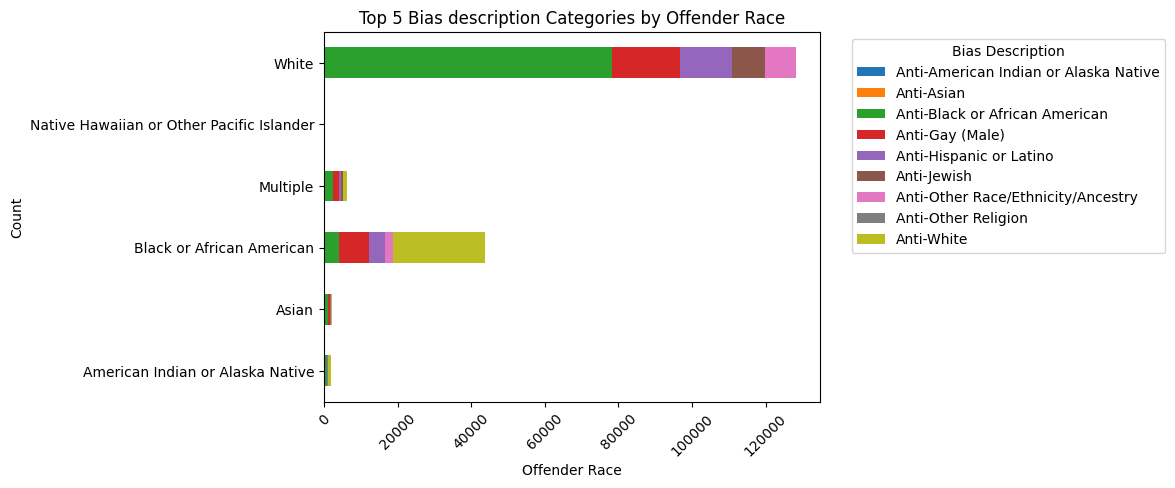

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for specific offender races
selected_offender_races = ['White', 'Black or African American', 'Multiple', 'Asian', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']
filtered_data = bar_data[bar_data['OFFENDER_RACE'].isin(selected_offender_races)]

# Group and count data
grouped_data = filtered_data.groupby(['OFFENDER_RACE', 'BIAS_DESC']).size().unstack()

# Find top 5 BIAS_DESC categories for each OFFENDER_RACE
top_categories = grouped_data.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

# Filter the data to include only the top categories
filtered_grouped_data = grouped_data.apply(lambda row: row[top_categories.loc[row.name]], axis=1)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
filtered_grouped_data.plot(kind='barh', stacked=True)
plt.xlabel('Offender Race')
plt.ylabel('Count')
plt.title('Top 5 Bias description Categories by Offender Race')
plt.legend(title='Bias Description',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






<Figure size 1000x600 with 0 Axes>

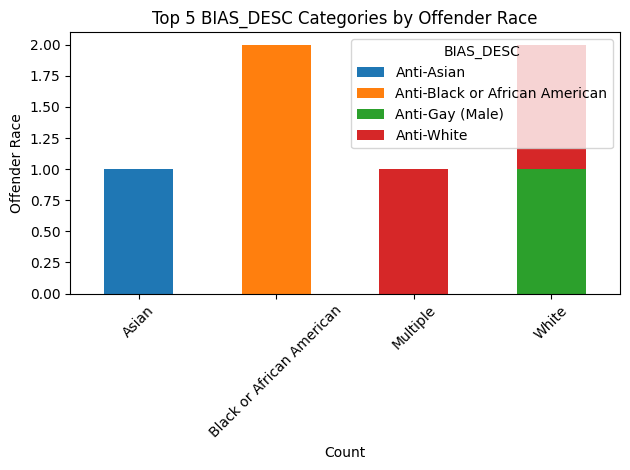

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (you can replace this with your actual data)
data = {
    'OFFENDER_RACE': ['White', 'Black or African American', 'Multiple', 'Asian', 'White', 'Black or African American'],
    'BIAS_DESC': ['Anti-Gay (Male)', 'Anti-Black or African American', 'Anti-White', 'Anti-Asian', 'Anti-White', 'Anti-Black or African American']
}

# Create a DataFrame
bar_data = pd.DataFrame(data)

# Filter data for specific offender races
selected_offender_races = ['White', 'Black or African American', 'Multiple', 'Asian', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']
filtered_data = bar_data[bar_data['OFFENDER_RACE'].isin(selected_offender_races)]

# Group and count data
grouped_data = filtered_data.groupby(['OFFENDER_RACE', 'BIAS_DESC']).size().unstack()

# Find top 5 BIAS_DESC categories for each OFFENDER_RACE
top_categories = grouped_data.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

# Filter the data to include only the top categories
filtered_grouped_data = grouped_data.apply(lambda row: row[top_categories.loc[row.name]], axis=1)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
filtered_grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Count')
plt.ylabel('Offender Race')
plt.title('Top 5 BIAS_DESC Categories by Offender Race')
plt.legend(title='BIAS_DESC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()